##                                Fiancial Risk For Loan Approval

###Business Problem
In the lending industry, balancing growth with effective risk management is a key challenge. My task is to build a predictive model to assess loan applications, helping to minimize default risks while maximizing growth opportunities. Traditional loan approval processes often overlook nuanced indicators of risk, which can lead to unnecessary loan denials or, conversely, to missed red flags in approvals. By developing a classification model that evaluates loan approval likelihood based on comprehensive demographic and financial features (such as income, credit history, and debt-to-income ratio), I aim to enhance decision-making processes, reducing default rates and optimizing the bank’s resource allocation.

###Primary Objective
My primary objective is to create a reliable model that improves the accuracy and efficiency of loan approvals. This model will help the bank to identify low-risk applicants more effectively, allowing for more approvals without increasing the likelihood of defaults. Additionally, early detection of high-risk applicants will empower the bank to deny or offer adjusted terms on high-risk loans, protecting its financial stability. This approach will make the approval process more streamlined, responsive, and customer-friendly by delivering well-informed, quicker decisions.

###Expected Impact
Through this project, I aim to reduce default rates and strengthen the bank’s loan portfolio by improving risk management strategies. The insights from my model will help the bank adjust its credit policies as needed to respond to economic changes, maintain a balanced portfolio, and maximize profitability. Ultimately, the model will lay a data-driven foundation for strategic, sustainable growth by helping the bank optimize its revenue streams, minimize non-performing assets, and adapt effectively to market conditions.


### 1. Read the dataset and Encode the class column to 0 and 1

In [0]:
# Your code goes in here
from pyspark.sql import SQLContext # imports the SQl contect class
sqlContext = SQLContext(sc) # creates a sql context so we can read data from tables
spark_df = sqlContext.sql("Select * from loan") # it queries all the variables from loan and save it as spark_df
spark_df.count()

/databricks/spark/python/pyspark/sql/context.py:117: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Out[1]: 20000

In [0]:
from pyspark.sql.types import IntegerType # imports a class to cast a variable as integer
from pyspark.sql.functions import udf # import user defined functions package
from pyspark.sql.functions import *
spark_df.groupBy('LoanApproved').count().show() # counts the number of 0's and 1's as it uses groupBy


+------------+-----+
|LoanApproved|count|
+------------+-----+
|           1| 4780|
|           0|15220|
+------------+-----+



### 2. Data Visualizations 

In [0]:
display(spark_df.describe()) # displays the summary statistics

summary,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
mean,39.7526,59161.47355,571.6124,null,null,17.52275,24882.8678,54.057,null,1.5173,null,454.2927,0.28638103042597446,3.02335,0.993,0.2857346488575262,0.0524,null,0.10005,23.99365,14.9573,4946.05215,1782.5551,96964.3955,36252.41275,4891.715520833314,0.7999176481520192,5.00265,72294.31885,0.23912416780000004,0.23911001653328112,911.6070519223084,0.4021816565196182,0.239,50.76677999999996
stddev,11.622712575486878,40350.845168361644,50.99735780180329,null,null,11.316836394363879,13427.421217074787,24.66485695799672,null,1.386324927583803,null,240.50760928132053,0.15979289353159784,1.7361611360338964,0.9869648955181998,0.16021077057903713,0.22283788465191828,null,0.30007415704286505,4.945435526232961,8.371551878477668,6604.887477274666,2245.378812353171,120799.9392187125,47251.510912601196,3296.771598055084,0.1206649491449634,2.2368042252636036,117920.02144409665,0.035509492448796566,0.042205188332545586,674.5834731342931,0.33892429634946963,0.4264834046064626,7.7782623702132225
min,18,15000,343,Employed,Associate,0,3674,12,Divorced,0,Mortgage,50,9.74490752839952E-4,0,0,0.0017200290084425716,0,Auto,0,8,1,73,24,2098,372,1250.0,0.259203057820703,0,1000,0.130101,0.11330959480453648,97.03019288626983,0.016043211209529867,0,28.8
max,80,485341,712,Unemployed,Master,61,184732,120,Widowed,5,Rent,2919,0.9173800815542682,13,7,0.9022526895282088,1,Other,1,45,29,200089,52572,2619627,1417302,25000.0,0.9994327597206204,16,2603208,0.405029,0.4467873210539924,10892.629519897173,4.647656816403158,1,84.0


In [0]:
# Convert summary statistics to Pandas DataFrame
summary_df = spark_df.describe().toPandas()

# Set the index to the first column (which contains the metric names)
summary_df.set_index('summary', inplace=True)

# Transpose the DataFrame
transposed_summary_df = summary_df.transpose()

# Display the transposed DataFrame
transposed_summary_df

summary,count,mean,stddev,min,max
Age,20000,39.7526,11.622712575486878,18,80
AnnualIncome,20000,59161.47355,40350.845168361644,15000,485341
CreditScore,20000,571.6124,50.99735780180329,343,712
EmploymentStatus,20000,None,None,Employed,Unemployed
EducationLevel,20000,None,None,Associate,Master
Experience,20000,17.52275,11.316836394363879,0,61
LoanAmount,20000,24882.8678,13427.421217074787,3674,184732
LoanDuration,20000,54.057,24.66485695799672,12,120
MaritalStatus,20000,None,None,Divorced,Widowed
NumberOfDependents,20000,1.5173,1.386324927583803,0,5


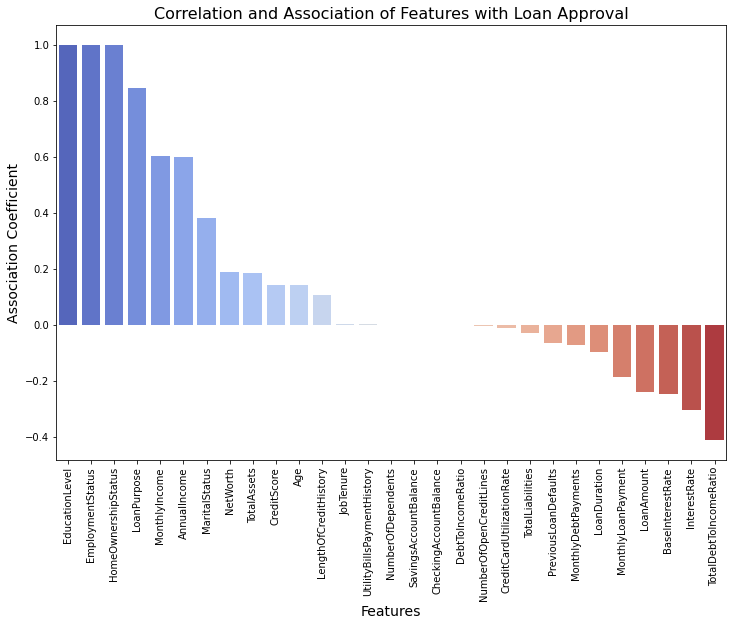

In [0]:
# Initialize Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Loan Approval Analysis") \
    .getOrCreate()

# Calculate correlation of numerical features with LoanApproved
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.stat import ChiSquareTest

# List of numerical and categorical features
numerical_features = [
    "Age", "AnnualIncome", "CreditScore", "LoanAmount", "LoanDuration",
    "NumberOfDependents", "MonthlyDebtPayments", "CreditCardUtilizationRate",
    "NumberOfOpenCreditLines", "DebtToIncomeRatio", "PreviousLoanDefaults",
    "LengthOfCreditHistory", "SavingsAccountBalance", "CheckingAccountBalance",
    "TotalAssets", "TotalLiabilities", "MonthlyIncome", "JobTenure", "NetWorth",
    "BaseInterestRate", "InterestRate", "MonthlyLoanPayment", "TotalDebtToIncomeRatio", "UtilityBillsPaymentHistory"
]
categorical_features = [
    "EmploymentStatus", "EducationLevel", "MaritalStatus", "HomeOwnershipStatus", 
    "LoanPurpose"
]
# Calculate correlations for numerical features
correlations = {}
for feature in numerical_features:
    correlations[feature] = spark_df.stat.corr(feature, "LoanApproved")

# Calculate Chi-square test results for categorical features
for feature in categorical_features:
    # Index categorical feature
    indexer = StringIndexer(inputCol=feature, outputCol=f"{feature}_Index")
    indexed_df = indexer.fit(spark_df).transform(spark_df)
    
    # Convert indexed column to vector
    assembler = VectorAssembler(inputCols=[f"{feature}_Index"], outputCol=f"{feature}_Vector")
    vectorized_df = assembler.transform(indexed_df)
    
    # Run Chi-square test
    chi_square_result = ChiSquareTest.test(vectorized_df, f"{feature}_Vector", "LoanApproved").head()
    p_value = chi_square_result.pValues[0]
    
    # A lower p-value (e.g., < 0.05) suggests a stronger association
    chi_score = 1 - p_value
    correlations[feature] = chi_score

# Convert to a Pandas DataFrame for visualization
correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Association'])
correlation_df.sort_values(by='Association', ascending=False, inplace=True)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for correlations and associations with the new color palette
sns.barplot(data=correlation_df, x='Feature', y='Association', palette='coolwarm')

# Set title and labels
plt.title('Correlation and Association of Features with Loan Approval', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Association Coefficient', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()


#### Annual Income Levels by Loan Approval Status

In [0]:
#Hypothesis: People with high average income are more likely to have their loans approved compared to those with lower average income.
hypodf=spark_df.groupby('LoanApproved').mean('AnnualIncome') # computes the average AnnualIncome by LoanApproved
hypodf.show()

+------------+------------------+
|LoanApproved| avg(AnnualIncome)|
+------------+------------------+
|           1|102210.55146443515|
|           0| 45641.46090670171|
+------------+------------------+



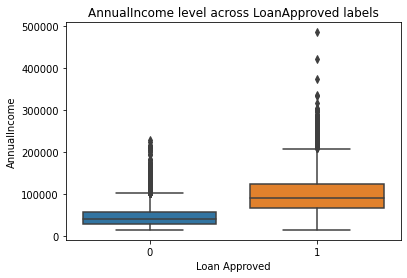

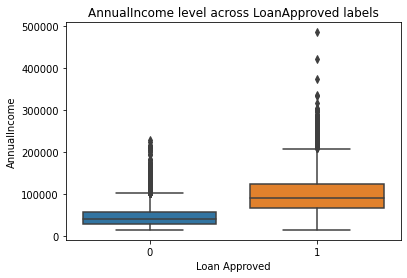

In [0]:
## using seaborn or matplotlib 
import matplotlib.pyplot as plt # imports matplotlib for data viz
import numpy as np # imports numpy as np
import seaborn as sns # imports seaborn for data viz

fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = spark_df.select('AnnualIncome', 'LoanApproved').toPandas() # selects AnnualIncome and LoanApprovedvariables and converts the dataset from spark df to pandas df

ax = sns.boxplot(x='LoanApproved', y='AnnualIncome', data = pandas_df) # creates a boxplot

ax.set_title('AnnualIncome level across LoanApproved labels') # sets the title of the boxplot
ax.set(xlabel='Loan Approved', ylabel='AnnualIncome') # names the axes

display(fig)

####Credit Score Distribution by Loan Approval Status

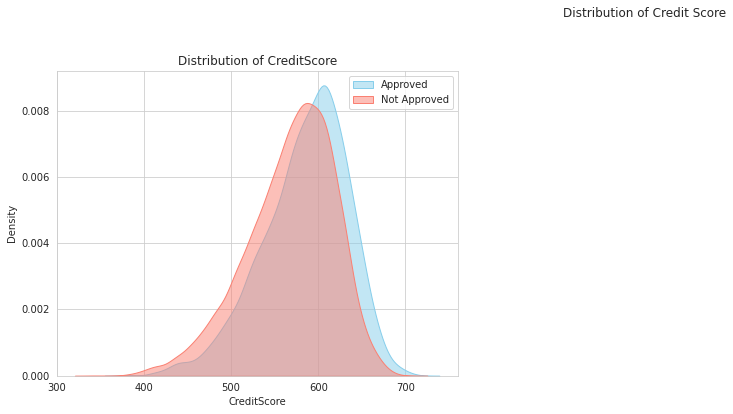

In [0]:

from pyspark.sql import functions as F

# Filtering approved and not approved loans
approved_df = spark_df.filter(spark_df["LoanApproved"] == 1).select("CreditScore")
not_approved_df = spark_df.filter(spark_df["LoanApproved"] == 0).select("CreditScore")

# Converting Spark DataFrames to Pandas DataFrames
approved_pd = approved_df.toPandas()
not_approved_pd = not_approved_df.toPandas()

# Plot distributions
plt.figure(figsize=(18, 6))
for idx, col in enumerate(["CreditScore"]):
    plt.subplot(1, 3, idx + 1)
    sns.kdeplot(approved_pd[col], label="Approved", color="skyblue", fill=True, alpha=0.5)
    sns.kdeplot(not_approved_pd[col], label="Not Approved", color="salmon", fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.legend()

plt.suptitle("Distribution of Credit Score")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Distribution of Loan Applications by Purpose

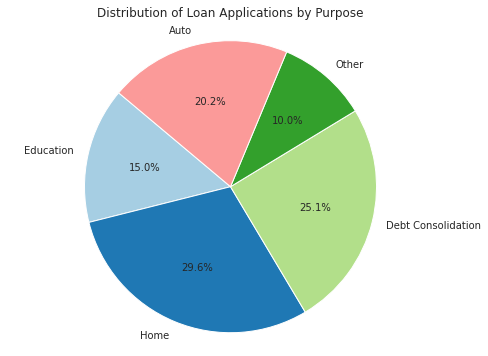

In [0]:
from pyspark.sql import SparkSession


# Initializing Spark session
spark = SparkSession.builder.appName("Loan Purpose Visualization").getOrCreate()

# Aggregate data to count applications by Loan Purpose
loan_purpose_counts = spark_df.groupBy("LoanPurpose").agg(
    F.count("*").alias("ApplicationCount")
)
# Converting to Pandas DataFrame
loan_purpose_pdf = loan_purpose_counts.toPandas()

# Creating a Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(loan_purpose_pdf['ApplicationCount'], 
        labels=loan_purpose_pdf['LoanPurpose'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)

plt.title("Distribution of Loan Applications by Purpose")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Distribution of Risk Scores by Loan Approval Status

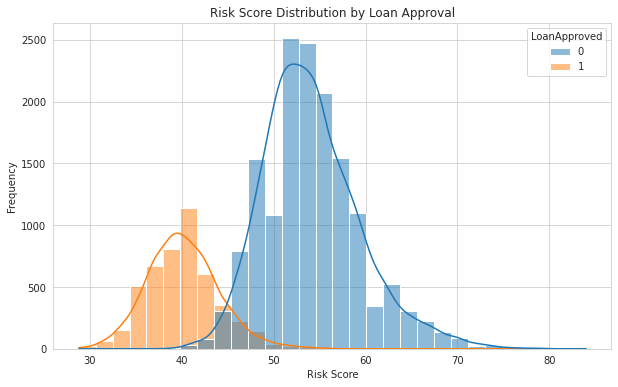

In [0]:

pandas_df = spark_df.toPandas()

# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=pandas_df, x='RiskScore', hue='LoanApproved', kde=True, bins=30)

# Customizing the plot
plt.title('Risk Score Distribution by Loan Approval')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#### Loan Approval Rates by Employment Status and Education Level

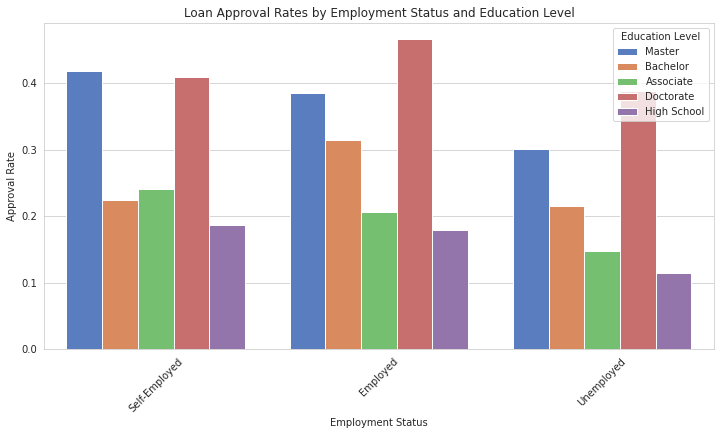

In [0]:
from pyspark.sql import SparkSession


# Initializing Spark session
spark = SparkSession.builder.appName("Loan Approval Analysis").getOrCreate()

# Calculating Approval Rates
approval_rate_df = spark_df.groupBy('EmploymentStatus', 'EducationLevel', 'Age') \
    .agg(
        (F.sum(spark_df['LoanApproved']) / F.count(spark_df['LoanApproved'])).alias('ApprovalRate')
    )

# Converting to Pandas DataFrame
approval_rate_pdf = approval_rate_df.toPandas()

# Create the Bar Plot without error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='EmploymentStatus', y='ApprovalRate', hue='EducationLevel', 
            data=approval_rate_pdf, palette='muted', ci=None)  # ci=None disables error bars

# Set titles and labels
plt.title('Loan Approval Rates by Employment Status and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Approval Rate')
plt.legend(title='Education Level', loc='upper right')

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


#### Loan Amount Distribution by Loan Approval Status

In [0]:
#Higher loan amounts are associated with a lower likelihood of loan approval.
LoanAmount_df=spark_df.groupby('LoanApproved').mean('LoanAmount') # computes the average LoanAmount by LoanApproved  
LoanAmount_df.show()

+------------+------------------+
|LoanApproved|   avg(LoanAmount)|
+------------+------------------+
|           1| 19144.70941422594|
|           0|26684.996386333773|
+------------+------------------+



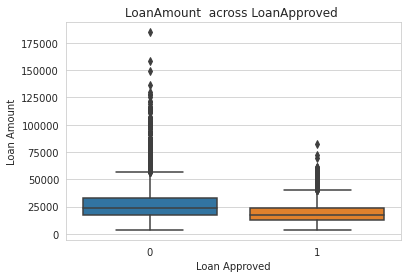

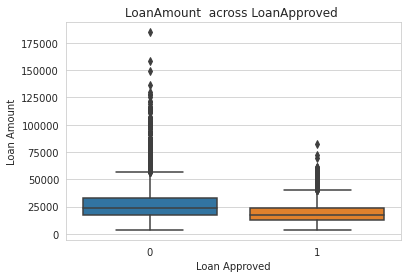

In [0]:
## using seaborn or matplotlib i
import matplotlib.pyplot as plt # imports matplotlib for data viz
import numpy as np # imports numpy as np
import seaborn as sns # imports seaborn for data viz

fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = spark_df.select('LoanAmount', 'LoanApproved').toPandas() # selects LoanAmount and LoanApproved variables and save it as a pandas df

ax = sns.boxplot(x='LoanApproved', y='LoanAmount', data = pandas_df) #  create sa box plot

ax.set_title('LoanAmount  across LoanApproved ') # sets the title of the boxplot
ax.set(xlabel='Loan Approved', ylabel='Loan Amount') # names the axes

display(fig)


### 3. Replacing Missing Values - Numerical Variables


In [0]:
#Setting the target variable
target = 'LoanApproved'

In [0]:
# categorical variables
dtypes = spark_df.dtypes
cat_input = [] # creates a variable of list type to save the categorical input variables
for i in range(0, len(spark_df.columns)): # iterate over the spark_df variables
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) # add the name of the categorical variable to cat_input
cat_input = list(set(cat_input)-set(target)) 
cat_input

Out[15]: ['EducationLevel',
 'EmploymentStatus',
 'HomeOwnershipStatus',
 'LoanPurpose',
 'MaritalStatus']

In [0]:
# numerical variables
num_input = list(set(spark_df.columns) - set([target]) - set(cat_input)- set(['ApplicationDate','BaseInterestRate','MonthlyIncome','TotalDebtToIncomeRatio','MonthlyLoanPayment','LoanDuration','NumberOfDependents','CreditCardUtilizationRate','UtilityBillsPaymentHistory', 'LengthOfCreditHistory'])) # identifies the numerical input variables 
num_input

Out[16]: ['RiskScore',
 'NumberOfOpenCreditLines',
 'CheckingAccountBalance',
 'PaymentHistory',
 'DebtToIncomeRatio',
 'NetWorth',
 'BankruptcyHistory',
 'JobTenure',
 'AnnualIncome',
 'MonthlyDebtPayments',
 'Age',
 'TotalLiabilities',
 'InterestRate',
 'NumberOfCreditInquiries',
 'LoanAmount',
 'CreditScore',
 'TotalAssets',
 'SavingsAccountBalance',
 'Experience',
 'PreviousLoanDefaults']

### 4. Create Custom Transformer for Data Imputation

In [0]:
from pyspark.sql.types import DoubleType
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col



class NumericImputer(Transformer, HasInputCol, HasOutputCol): # replacing missing values in numerical columns

    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(NumericImputer, self).__init__()  # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol)  # do not change this part at all when creating custom transformers

        
    def setParams(self, inputCol=None, outputCol=None):  # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol)  # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset):  # do not change this part at all when creating custom transformers

      out_col = self.getOutputCol()  # do not change this part at all when creating custom transformers
      in_col = self.getInputCol()  # do not change this part at all when creating custom transformers
      
      
      
      from pyspark.sql.functions import when  
      from pyspark.sql.types import DoubleType
      median_v = dataset.approxQuantile(in_col, [0.5], 0)[0] # compute median #dataset = dataset.fillna(median_v, subset=in_col)
      return dataset.withColumn(out_col, when(col(in_col).isNull(), median_v).otherwise(col(in_col)).cast(DoubleType())) # replacing null values with median if the value is null otherwise keeping it as is

In [0]:
numericimputers = [] # creating an empty list
for column in num_input: # creating a list of numeric imputers each of which responsible for imputing a variable
  numericimputers.append(NumericImputer(inputCol = column , outputCol = column))
numericimputers

Out[18]: [NumericImputer_4f9cd5fb3556,
 NumericImputer_b480d185a8dc,
 NumericImputer_197da7ac70f7,
 NumericImputer_d1b10452a8b3,
 NumericImputer_288e57ee9bc1,
 NumericImputer_9b4050b8c1f1,
 NumericImputer_52de9a88f6e3,
 NumericImputer_d88d05786b09,
 NumericImputer_357290a5d44f,
 NumericImputer_429641887617,
 NumericImputer_b85e9406ff69,
 NumericImputer_a85e17aa6bc3,
 NumericImputer_b15499e19c83,
 NumericImputer_70b8d60a8eaa,
 NumericImputer_752e8fc8056c,
 NumericImputer_fd5c62ab5021,
 NumericImputer_cac7425cba6b,
 NumericImputer_fb68f2a73ef3,
 NumericImputer_b1aaeff87cef,
 NumericImputer_d5f460f72a16]

### 5. Replacing Missing Values - Categorical Variables


In [0]:
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col

class CategoricalImputer(Transformer, HasInputCol, HasOutputCol): # replacing missing values in categorical columns

    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(CategoricalImputer, self).__init__()  # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol)  # do not change this part at all when creating custom transformers

        
    def setParams(self, inputCol=None, outputCol=None):  # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol)  # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset):  # do not change this part at all when creating custom transformers

      out_col = self.getOutputCol()  # do not change this part at all when creating custom transformers
      in_col = self.getInputCol()  # do not change this part at all when creating custom transformers
      
      
      #Groupby column name in_col
      temp = dataset.groupby(in_col).count() # groupby and count the levels (such as how many observations there are for each level)
      temp = temp.filter(temp[in_col]!= 'null') # exclude the null in case the domintaing level is null
      #sort it and convert to pandas
      sorted_df = temp.sort(temp['count'].desc()).toPandas() # sort it find the most occuring level (which is the mode)
      #mode 
      mode_v = sorted_df.loc[0][in_col] # get the mode
      
      return dataset.withColumn(out_col, when(col(in_col).isNull(), mode_v).otherwise(col(in_col))) # repace the nulls with the mode for that variable

In [0]:
cat_imputers = [CategoricalImputer(inputCol = column, outputCol = column) for column in cat_input]
cat_imputers

Out[20]: [CategoricalImputer_1cdecea687a0,
 CategoricalImputer_1ab56a06e4d2,
 CategoricalImputer_97c878477bbc,
 CategoricalImputer_d947598ce6c7,
 CategoricalImputer_1d7fff942953]

### 6. Normalize Variables


In [0]:
# normalize a dataset

from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType


class Scaler(Transformer, HasInputCol, HasOutputCol): # we will scale the variables (x-xmin/range)

    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(Scaler, self).__init__() # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol) # do not change this part at all when creating custom transformers

        
        
    def setParams(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol) # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol() # get the out_col
      in_col = dataset[self.getInputCol()] # get the input_col
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first() # find max and min
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin)) # scale the variable and save it in place


In [0]:
scalers = [Scaler(inputCol = column, outputCol = column+"_scaled") for column in num_input]
scalers

Out[22]: [Scaler_d3f33f6a088a,
 Scaler_a989489c483d,
 Scaler_ae6821ae501d,
 Scaler_ad25bb5f7a50,
 Scaler_c2e7eff43cfb,
 Scaler_56115d77068a,
 Scaler_c13adf9595a8,
 Scaler_0e9b67886e41,
 Scaler_36842bf7ff2d,
 Scaler_edbbd2e056c2,
 Scaler_cf3dcd945047,
 Scaler_17695006bee8,
 Scaler_74e952fd7ef9,
 Scaler_ef7fc09abc07,
 Scaler_4e163c8b7fa1,
 Scaler_1b85ed787475,
 Scaler_727b0f56cc89,
 Scaler_9656bac9cb06,
 Scaler_8f70ef2ab6b1,
 Scaler_04d3ceb3f250]

### 7. Encode Dummy Variables


In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input] # this will first create indexers (it means it will number each category in a variable)
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input] # This will use the numbers to create the binary variables

### 8. Combine Steps


In [0]:
input_cols = [] # creates an empty list
for i in cat_input: #iterates over categorical variables
  input_cols.append(i+"_dummy") # saves the name of the dummy encoded categorical variables (they are not categorical now though)
for i in num_input: # iterates over the numerical variables
  input_cols.append(i+"_scaled") # saves the name of standardized numerical variables
input_cols

Out[24]: ['EducationLevel_dummy',
 'EmploymentStatus_dummy',
 'HomeOwnershipStatus_dummy',
 'LoanPurpose_dummy',
 'MaritalStatus_dummy',
 'RiskScore_scaled',
 'NumberOfOpenCreditLines_scaled',
 'CheckingAccountBalance_scaled',
 'PaymentHistory_scaled',
 'DebtToIncomeRatio_scaled',
 'NetWorth_scaled',
 'BankruptcyHistory_scaled',
 'JobTenure_scaled',
 'AnnualIncome_scaled',
 'MonthlyDebtPayments_scaled',
 'Age_scaled',
 'TotalLiabilities_scaled',
 'InterestRate_scaled',
 'NumberOfCreditInquiries_scaled',
 'LoanAmount_scaled',
 'CreditScore_scaled',
 'TotalAssets_scaled',
 'SavingsAccountBalance_scaled',
 'Experience_scaled',
 'PreviousLoanDefaults_scaled']

In [0]:
# your code goes in here
from pyspark.ml.feature import StringIndexer
import functools 
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #conactenates all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [numericimputers, cat_imputers, indexers, encoders, scalers]) #indexers,  encoders, standardizers])
stages.append(assembler)
stages



Out[25]: [NumericImputer_4f9cd5fb3556,
 NumericImputer_b480d185a8dc,
 NumericImputer_197da7ac70f7,
 NumericImputer_d1b10452a8b3,
 NumericImputer_288e57ee9bc1,
 NumericImputer_9b4050b8c1f1,
 NumericImputer_52de9a88f6e3,
 NumericImputer_d88d05786b09,
 NumericImputer_357290a5d44f,
 NumericImputer_429641887617,
 NumericImputer_b85e9406ff69,
 NumericImputer_a85e17aa6bc3,
 NumericImputer_b15499e19c83,
 NumericImputer_70b8d60a8eaa,
 NumericImputer_752e8fc8056c,
 NumericImputer_fd5c62ab5021,
 NumericImputer_cac7425cba6b,
 NumericImputer_fb68f2a73ef3,
 NumericImputer_b1aaeff87cef,
 NumericImputer_d5f460f72a16,
 CategoricalImputer_1cdecea687a0,
 CategoricalImputer_1ab56a06e4d2,
 CategoricalImputer_97c878477bbc,
 CategoricalImputer_d947598ce6c7,
 CategoricalImputer_1d7fff942953,
 StringIndexer_fe1e2e48079e,
 StringIndexer_f525c676d566,
 StringIndexer_f9a98ccf2a40,
 StringIndexer_2ebf98b2f30a,
 StringIndexer_3be941827beb,
 OneHotEncoder_fa8c018ed018,
 OneHotEncoder_11e844858ccf,
 OneHotEncoder_0a5

### 9. Run Pipeline

In [0]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import when
pipeline = Pipeline(stages=stages) # creates the pipeline object
spark_df = pipeline.fit(spark_df).transform(spark_df) # runs the pipeline

### 10. Create Training & Testing

In [0]:
train, test = spark_df.randomSplit([0.7, 0.3], seed = 2018) # divides the dataset into training and testing
print("Training Dataset Count: " + str(train.count())) # gives hpow many observations in the training set
print("Test Dataset Count: " + str(test.count())) # gives how many observations in the test set

Training Dataset Count: 14033
Test Dataset Count: 5967


### 11. Create Logistic Regression

In [0]:
lr = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10, regParam=0.1, elasticNetParam=0.8) # creates a logistic regression instance (model)
logRegModel = lr.fit(train) # trains the model

In [0]:
print("Logistic Regression Model - Prediction and Probability Outputs")
logRegModel.transform(train).select('probability', 'prediction').toPandas() # gets the model probabilities and classes

Logistic Regression Model - Prediction and Probability Outputs


/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field probability. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,probability,prediction
0,"[0.8806604845358893, 0.1193395154641107]",0.0
1,"[0.8797508547141178, 0.12024914528588215]",0.0
2,"[0.8899782664112906, 0.11002173358870937]",0.0
3,"[0.21868495890008358, 0.7813150410999165]",1.0
4,"[0.36696904727254176, 0.6330309527274582]",1.0
...,...,...
14028,"[0.2807662487732163, 0.7192337512267837]",1.0
14029,"[0.5457306782612595, 0.45426932173874046]",0.0
14030,"[0.930339480482803, 0.06966051951719698]",0.0
14031,"[0.9601784443313673, 0.03982155566863266]",0.0


### 12. Model Parameters

In [0]:
print("Coefficients: \n" + str(logRegModel.coefficientMatrix)) # gives the model coef
print("Intercept: " + str(logRegModel.interceptVector)) # gives the model intercept

Coefficients: 
1 X 36 CSRMatrix
(0,16) -9.425
(0,24) 3.9975
Intercept: [1.7525139977413973]


### 13.  Performance checks
1. Write code to calculate accuracy rate, false positive rate, false negative rate
2. Write code to visualize and display ROC (this is called ROC)

#### 13.1  Performance checks for Training

In [0]:
print("Logistic Regression Model Summary")
summary = logRegModel.summary # gets the modelo summary and saves it as summary
accuracy = summary.accuracy # access the accuracy within model summary
falsePositiveRate = summary.weightedFalsePositiveRate # access the FPR within model summary
truePositiveRate = summary.weightedTruePositiveRate # access the TPR within model summary
fMeasure = summary.weightedFMeasure() # access the FM within model summary
precision = summary.weightedPrecision # access the precision within model summary
recall = summary.weightedRecall # access the recall within model summary
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Logistic Regression Model Summary
Accuracy: 0.9414237867882848
FPR: 0.18040528306875395
TPR: 0.9414237867882848
F-measure: 0.9387110857182872
Precision: 0.9443158748825928
Recall: 0.9414237867882848


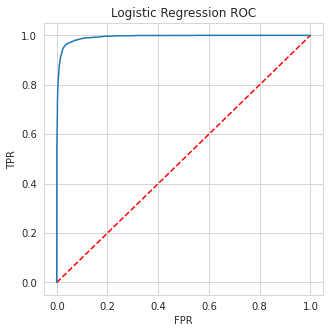

In [0]:
import matplotlib.pyplot as plt # imparts matplotlib for viz
plt.figure(figsize=(5,5)) # determines the figure size 
plt.plot([0, 1], [0, 1], 'r--') # (draws the diagonal red line - random decision line)
plt.plot(summary.roc.select('FPR').collect(), # plots the FPR vs TPR
         summary.roc.select('TPR').collect())
plt.title('Logistic Regression ROC')
plt.xlabel('FPR') # names the x axis
plt.ylabel('TPR')  # names the y axis
display(plt.show()) # displays the plot

#### 12.2  Performance checks for Testing

In [0]:
predictions = logRegModel.transform(test) # takes the test data and makes predictions
predictions = predictions.withColumnRenamed("LoanApproved", "label") # rename the LoanApproved column as label (actual values)
predictions.select('label', 'prediction', 'probability').show(10) # selects the actual, predicted, and probability


+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.81524249899277...|
|    0|       0.0|[0.94683965554642...|
|    0|       0.0|[0.94743344370445...|
|    0|       0.0|[0.91578212598866...|
|    0|       0.0|[0.88910379744343...|
|    0|       0.0|[0.79548654406061...|
|    0|       0.0|[0.87749682813912...|
|    0|       0.0|[0.93374067396637...|
|    0|       0.0|[0.83837120390179...|
|    0|       0.0|[0.91524675580216...|
+-----+----------+--------------------+
only showing top 10 rows



In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator # imports the BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions)) # evaluates the results using the predictions dataframe above

Test Area Under ROC 0.9944433402034116


###Decision Tree

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create a Decision Tree instance
dt = DecisionTreeClassifier(labelCol=target, featuresCol="features")

# Train the model
decisionTreeModel = dt.fit(train)

In [0]:
import warnings

# Suppress specific warnings related to Arrow and conversion
warnings.filterwarnings("ignore", category=UserWarning, message="toPandas attempted Arrow optimization")
print("Decision Tree Model - Prediction and Probability Outputs")
decisionTreeModel.transform(train).select('probability', 'prediction').toPandas()

Decision Tree Model - Prediction and Probability Outputs


,probability,prediction
0,"[0.9963589633754552, 0.0036410366245448705]",0.0
1,"[0.9963589633754552, 0.0036410366245448705]",0.0
2,"[0.9963589633754552, 0.0036410366245448705]",0.0
3,"[0.01716901945822205, 0.982830980541778]",1.0
4,"[0.04285714285714286, 0.9571428571428572]",1.0
...,...,...
14028,"[0.01716901945822205, 0.982830980541778]",1.0
14029,"[0.01716901945822205, 0.982830980541778]",1.0
14030,"[0.9963589633754552, 0.0036410366245448705]",0.0
14031,"[0.9963589633754552, 0.0036410366245448705]",0.0


In [0]:
print("Depth of the tree: ", decisionTreeModel.depth)
print("Number of nodes in the tree: ", decisionTreeModel.numNodes)
print("Feature Importances: \n" + str(decisionTreeModel.featureImportances))
tree_string = decisionTreeModel.toDebugString
print("Decision Tree Structure:\n", tree_string)

Depth of the tree:  5
Number of nodes in the tree:  47
Feature Importances: 
(36,[4,16,17,20,21,24,25,28,30,31,35],[0.005496717788628412,0.883504186745207,0.0005017456246505606,0.06872794942043894,0.0076681332030446945,0.01562050037921803,0.0008362427077509344,0.0009307744921053888,0.006923078160273119,0.0010152378023865864,0.008775433676296223])
Decision Tree Structure:
 DecisionTreeClassificationModel: uid=DecisionTreeClassifier_838cc3f2586c, depth=5, numNodes=47, numClasses=2, numFeatures=36
  If (feature 16 <= 0.30797101449275366)
   If (feature 16 <= 0.25181159420289856)
    If (feature 30 <= 0.28871135216339516)
     If (feature 24 <= 0.006725971157096659)
      If (feature 17 <= 0.34615384615384615)
       Predict: 0.0
      Else (feature 17 > 0.34615384615384615)
       Predict: 1.0
     Else (feature 24 > 0.006725971157096659)
      Predict: 1.0
    Else (feature 30 > 0.28871135216339516)
     If (feature 24 <= 0.20223306069426225)
      Predict: 0.0
     Else (feature 24 > 0.

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate metrics
accuracy = evaluator.evaluate(predictions)  # Accuracy
fMeasure = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})  # F1 score
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})  # Weighted Precision
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})  # Weighted Recall

# Display results
print("Decision Tree Model Summary")
print("Accuracy: %s" % accuracy)
print("F-measure (F1 Score): %s" % fMeasure)
print("Precision: %s" % precision)
print("Recall: %s" % recall)

Decision Tree Model Summary
Accuracy: 0.9400249782910683
F-measure (F1 Score): 0.9400249782910683
Precision: 0.9461392968843304
Recall: 0.942684766214178


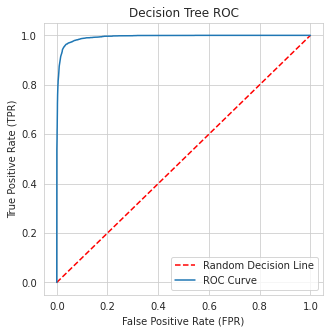

In [0]:
import matplotlib.pyplot as plt
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--', label="Random Decision Line")  
plt.plot(summary.roc.select('FPR').collect(),  # ROC Curve
         summary.roc.select('TPR').collect(), label="ROC Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="best")
plt.title("Decision Tree ROC")
plt.show()